# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Problem](#introduction)
* [Data](#data)
* [Data Preparation](#preparation)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Visualization using chloropleth maps](#maps)
* [Conclusion](#conclusion)



## Introduction: Problem <a name="introduction"></a>

This capstone project will give you a taste of what data scientists go through in real life when working with data. This is a Non-Commercial Project for Suggesting Developing Countries Like **India by predicting power(electricity) requirement of them** in future by using Machine Learning and visualize power requirement of all over world in the Choropleth Maps based on their requirement predicted.


Also Clear description of power produced in world from different sectors like Fossil Fuels,Renewable Energy etc. and suggesting the need for reducing the power from Fossil fuels and to increase power from Renewable resources.

Here we will be using **ARIMA model** for analysis of time series data and to produce predictions from them.Also we use folium maps library for the visualization of Chloropleth Maps.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* In order to apply the ARIMA model the data must be stationary .
* We can convert data to stationary by using various methods which we will be discussed later.

Following data sources will be needed to extract/generate the required information:
* Time series data **Electricity Consumption data in past years** this data is available in **World Bank Open Data** which is an open to all website.we can download data freely without any cost of money.
* For Visualization of data in Chloropleth maps we need latitude and longitudes of all countries for this we can use **Foursquare API** but the data needed is directly available in the **"worldcountries.csv"** file which contains all required data.So instead of using Foursquare API.I will be using this file for required data.

### Importing Dataset into Dataframe obtained from **World Bank Data Website** of Electricity Consumption of various countries in past years which will using to build **ARIMA model** to predict future requirement.

In [1]:
# The code was removed by Watson Studio for sharing.

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,206.340578,207.031259,219.356355,280.402518,312.476017,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Converting data into required format

In [2]:
df=df_data_1.set_index('Country Name')
df.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.340578,207.031259,219.356355,280.402518,312.476017,NaN,NaN,NaN,NaN,NaN
Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN
Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The data about Economic indicators of country from World Bank Open Data website.

In [3]:

body = client_14a9f9701e13487fa2f38574727c855a.get_object(Bucket='capstoneprojectcoursera-donotdelete-pr-50vxupoab8kolq',Key='Metadata_Country_API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_10577425.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN


### The data about Electricity Production from Renewable and Non Renewable resources  of various countries from World Bank Open Data website.

In [4]:

body = client_14a9f9701e13487fa2f38574727c855a.get_object(Bucket='capstoneprojectcoursera-donotdelete-pr-50vxupoab8kolq',Key='SE4ALLData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()



,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 31
0,BES Islands,BES,Access to Clean Fuels and Technologies for coo...,2.1_ACCESS.CFT.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BES Islands,BES,Access to electricity (% of rural population w...,1.2_ACCESS.ELECTRICITY.RURAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BES Islands,BES,Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BES Islands,BES,Access to electricity (% of urban population w...,1.3_ACCESS.ELECTRICITY.URBAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BES Islands,BES,Energy intensity level of primary energy (MJ/2...,6.1_PRIMARY.ENERGY.INTENSITY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the total Electricity produced from various resources Renewable and Non Renewable

In [5]:
df7=df_data_3.groupby(['Indicator Name','Indicator Code']).sum()
df7

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 31
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
Access to Clean Fuels and Technologies for cooking (% of total population),2.1_ACCESS.CFT.TOT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.165683e+04,1.176170e+04,1.186735e+04,1.196339e+04,1.205428e+04,1.214387e+04,1.222953e+04,1.228915e+04,12367.050000,0.0
Access to electricity (% of rural population with access),1.2_ACCESS.ELECTRICITY.RURAL,1.158844e+04,1.167224e+04,1.181268e+04,1.176108e+04,1.198999e+04,1.233390e+04,1.255137e+04,1.263104e+04,1.277585e+04,1.288824e+04,...,1.454868e+04,1.464796e+04,1.471998e+04,1.487120e+04,1.512883e+04,1.524959e+04,1.541246e+04,1.557014e+04,15753.819475,0.0
Access to electricity (% of total population),1.1_ACCESS.ELECTRICITY.TOT,1.390779e+04,1.400649e+04,1.414570e+04,1.425172e+04,1.445489e+04,1.487300e+04,1.513057e+04,1.523964e+04,1.538532e+04,1.552153e+04,...,1.710575e+04,1.721987e+04,1.719850e+04,1.747550e+04,1.763600e+04,1.774735e+04,1.792089e+04,1.805275e+04,18213.324861,0.0
Access to electricity (% of urban population with access),1.3_ACCESS.ELECTRICITY.URBAN,1.681840e+04,1.687869e+04,1.699180e+04,1.706518e+04,1.723079e+04,1.772397e+04,1.780665e+04,1.790494e+04,1.798490e+04,1.805721e+04,...,1.924784e+04,1.936606e+04,1.928207e+04,1.956494e+04,1.963408e+04,1.969045e+04,1.979430e+04,1.989281e+04,19989.718915,0.0
Energy intensity level of primary energy (MJ/2011 USD PPP),6.1_PRIMARY.ENERGY.INTENSITY,1.518059e+03,1.535024e+03,1.575224e+03,1.570641e+03,1.557142e+03,1.551715e+03,1.512249e+03,1.453730e+03,1.431530e+03,1.404144e+03,...,1.203197e+03,1.198441e+03,1.190468e+03,1.166999e+03,1.144941e+03,1.126035e+03,1.088715e+03,1.039911e+03,0.000000,0.0
Renewable electricity output (GWh),4.1.2_REN.ELECTRICITY.OUTPUT,2.297296e+06,2.334057e+06,2.346391e+06,2.480837e+06,2.509950e+06,2.635481e+06,2.674050e+06,2.713664e+06,2.734697e+06,2.758611e+06,...,3.756016e+06,3.899254e+06,4.214746e+06,4.437319e+06,4.754868e+06,5.087462e+06,5.356734e+06,5.547803e+06,0.000000,0.0
Renewable electricity share of total electricity output (%),4.1_SHARE.RE.IN.ELECTRICITY,6.233285e+03,6.298475e+03,6.290746e+03,6.443682e+03,6.493574e+03,6.403417e+03,6.392511e+03,6.203774e+03,6.081364e+03,6.201867e+03,...,6.221028e+03,6.289638e+03,6.464917e+03,6.380813e+03,6.498034e+03,6.715741e+03,6.758310e+03,6.783387e+03,0.000000,0.0
Renewable energy consumption (TJ),3.1_RE.CONSUMPTION,3.983409e+07,4.054526e+07,4.108173e+07,4.148655e+07,4.174914e+07,4.280172e+07,4.340677e+07,4.377141e+07,4.423638e+07,4.551056e+07,...,5.246127e+07,5.326383e+07,5.514981e+07,5.590836e+07,5.750317e+07,5.931312e+07,6.051760e+07,6.164421e+07,0.000000,0.0
Renewable energy share of TFEC (%),2.1_SHARE.TOTAL.RE.IN.TFEC,6.413224e+03,6.476020e+03,6.608682e+03,6.634583e+03,6.642237e+03,6.691212e+03,6.631866e+03,6.522892e+03,6.450215e+03,6.450604e+03,...,6.362213e+03,6.368732e+03,6.361381e+03,6.308047e+03,6.322307e+03,6.382713e+03,6.348710e+03,6.304170e+03,0.000000,0.0


In [6]:
df7.plot.bar(y='1990',figsize=(4,4));

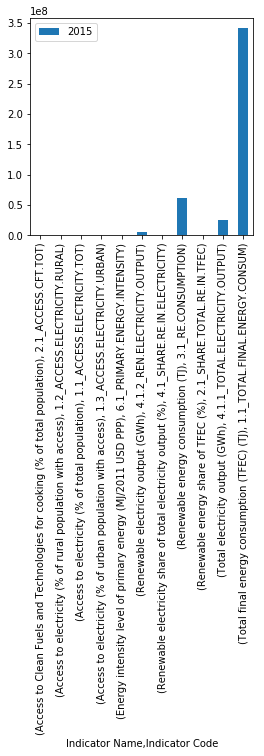

In [7]:
df7.plot.bar(y='2015',figsize=(4,4));

###   from the two above graphs we can clearly say that the percentage of energy production  from the renewable resources is clearly very less and almost constant form 1990 to 2014 
### So this the one of the serious issue for the present increasing pollution form the non renewable resources which we have to consider and we will discuss about this in the conclusion.

## Cleaning the data to obtain the required Dataset

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
years=list(map(str,range(1971,2015)))
#df.loc['India',years].plot(kind='line');
d=df.loc[:,years]
d.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,80.262510,88.515108,101.402041,123.355406,127.432825,55.562608,53.990979,52.410733,54.620014,56.663568,...,108.630377,143.911883,132.681281,171.879581,188.961667,206.340578,207.031259,219.356355,280.402518,312.476017
Albania,532.028432,568.403202,593.446746,591.032643,739.345093,908.674547,1067.814156,1098.483166,1065.767398,1142.965355,...,1722.072850,1218.360146,1213.124369,1617.744156,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d.describe(include='all')

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,184.000000,182.000000,182.000000
mean,1362.924167,1457.155402,1560.202552,1604.766710,1617.664267,1725.782541,1796.110277,1888.895023,2006.646186,2072.586203,...,3655.550523,3741.314480,3814.325402,3878.891042,3771.897746,3930.676754,3931.230989,3925.962073,3966.797431,3965.611052
std,2233.933168,2341.738267,2507.244852,2592.459410,2522.734481,2663.561326,2701.471845,2819.897129,2989.648766,3049.948146,...,4624.919800,4731.997086,4910.276123,5389.385340,5299.524305,5426.420735,5376.675026,5406.534669,5479.691970,5428.809609
min,6.043891,7.600347,5.797121,7.208366,6.678766,9.030101,9.909337,10.602888,11.670461,12.481410,...,33.365011,34.885209,25.322048,23.596014,35.725631,24.400935,31.148183,38.730820,39.812158,38.969149
25%,131.185290,142.029446,156.172175,165.755621,174.726666,191.602108,203.679956,216.507481,234.319668,251.803436,...,606.579655,664.162373,675.739119,626.478542,620.646092,645.176974,684.010242,719.359712,747.540057,776.774537
50%,318.249252,346.889930,397.089430,426.900991,441.826882,488.120885,530.860840,578.812162,685.050335,661.105063,...,1999.631947,2063.097317,2047.149308,2040.760435,2099.596260,2307.331503,2322.213342,2345.272523,2496.437138,2514.415633
75%,1753.532853,1827.765553,1955.511162,2070.195596,2214.610852,2418.749316,2550.135833,2693.520771,2935.012968,2872.094439,...,5037.465396,5230.143155,5412.409211,5439.247474,5183.744477,5376.477813,5430.628627,5234.925733,5191.646380,5112.797450
max,14084.409610,14488.416488,15541.790006,16286.774909,16313.924068,16913.420060,16515.363431,17314.781119,18862.290814,18725.676886,...,27988.029683,31328.386804,36852.544886,50063.954331,51259.187627,51439.908691,52373.877009,53202.833660,54799.174708,53832.479092


In [10]:
d.transpose()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1971,NaN,NaN,80.262510,532.028432,NaN,195.163395,677.885857,870.623730,NaN,NaN,...,NaN,40.327377,NaN,1199.344307,NaN,NaN,33.171686,2161.921572,1021.597370,665.271963
1972,NaN,NaN,88.515108,568.403202,NaN,209.787297,1307.248467,920.471571,NaN,NaN,...,NaN,37.673315,NaN,1272.731792,NaN,NaN,33.555502,2303.490327,1070.494945,844.672404
1973,NaN,NaN,101.402041,593.446746,NaN,228.947273,1689.435864,956.277673,NaN,NaN,...,NaN,39.330775,NaN,1346.434661,NaN,NaN,31.578373,2411.225946,1117.638952,866.415554
1974,NaN,NaN,123.355406,591.032643,NaN,253.176038,1860.557870,986.176142,NaN,NaN,...,NaN,33.884598,NaN,1345.771375,NaN,NaN,36.027565,2529.898191,1182.750982,901.207797
1975,NaN,NaN,127.432825,739.345093,NaN,280.426799,2296.490861,1004.182495,NaN,NaN,...,NaN,38.867713,NaN,1354.623969,NaN,NaN,37.624299,2642.489310,1150.089500,975.738181
1976,NaN,NaN,55.562608,908.674547,NaN,323.230395,2790.044873,1024.203812,NaN,NaN,...,NaN,46.297717,NaN,1425.536721,NaN,NaN,42.786872,2770.927481,1166.173383,1037.680516
1977,NaN,NaN,53.990979,1067.814156,NaN,366.835612,3673.222237,1073.011152,NaN,NaN,...,NaN,53.222523,NaN,1471.318808,NaN,NaN,43.592626,2839.118628,1104.627230,949.723411
1978,NaN,NaN,52.410733,1098.483166,NaN,423.802994,4107.891705,1084.730587,NaN,NaN,...,NaN,53.984136,NaN,1523.295981,NaN,NaN,47.765858,2980.300832,1061.175746,886.444677
1979,NaN,NaN,54.620014,1065.767398,NaN,511.414499,4875.845553,1207.786268,NaN,NaN,...,NaN,52.812061,NaN,1568.026067,NaN,NaN,50.373634,3192.950462,1039.575006,925.483148
1980,NaN,NaN,56.663568,1142.965355,NaN,573.181169,5626.525350,1234.367688,NaN,NaN,...,NaN,53.887521,NaN,1584.992714,NaN,NaN,61.942022,3376.929082,1030.695014,976.386385


In [11]:
df.describe(include='all')

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
count,264,264,264,31.000000,31.000000,31.000000,31.000000,31.000000,32.000000,32.000000,...,183.000000,183.000000,184.000000,182.000000,182.000000,0.0,0.0,0.0,0.0,0.0
unique,264,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AUT,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,264,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2178.066836,2306.604319,2467.409699,2659.852122,2899.021657,3014.253753,3174.577284,...,3930.676754,3931.230989,3925.962073,3966.797431,3965.611052,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1689.237756,1777.325363,1928.007735,2078.485267,2333.155988,2469.020311,2544.706917,...,5426.420735,5376.675026,5406.534669,5479.691970,5428.809609,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,92.311060,96.920111,112.059857,120.583751,132.058238,143.835116,156.632887,...,24.400935,31.148183,38.730820,39.812158,38.969149,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1099.938752,1219.208030,1336.931500,1497.937046,1622.975646,1656.117426,1774.050015,...,645.176974,684.010242,719.359712,747.540057,776.774537,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1814.676017,1882.223711,2006.770396,2124.359184,2232.896504,2249.781885,2337.756267,...,2307.331503,2322.213342,2345.272523,2496.437138,2514.415633,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2535.743897,2743.948284,2837.871654,3040.462398,3189.011902,3375.928885,3482.709560,...,5376.477813,5430.628627,5234.925733,5191.646380,5112.797450,NaN,NaN,NaN,NaN,NaN


## Cleaning the data from above statistical data available to remove the NaN values in the above dataset

In [12]:
import numpy as np
df1=df.dropna(subset=["1971"],axis=0).iloc[:,14:]

In [13]:
df1=df1.transpose()
df1.columns

Index(['Angola', 'Albania', 'Arab World', 'United Arab Emirates', 'Argentina',
       'Australia', 'Austria', 'Belgium', 'Benin', 'Bangladesh',
       ...
       'Upper middle income', 'Uruguay', 'United States', 'Venezuela, RB',
       'Vietnam', 'World', 'Yemen, Rep.', 'South Africa', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country Name', length=149)

In [14]:
df1.tail()

Country Name,Angola,Albania,Arab World,United Arab Emirates,Argentina,Australia,Austria,Belgium,Benin,Bangladesh,...,Upper middle income,Uruguay,United States,"Venezuela, RB",Vietnam,World,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2=df1.drop(['2015','2016','2017','2018'])

In [16]:
df2.shape
df2=df2.iloc[0:44]

## Data Preparation <a name="preparation"></a>
## Changing the data into the suitable format to perform the time series analysis using **ARIMA Model**.

In [17]:
df2.index =  pd.to_datetime(df2.index,format='%Y')

In [18]:
from datetime import datetime
date_str1 = '2018'
date_dt1 = datetime.strptime(date_str1,'%Y')
print(date_dt1)

2018-01-01 00:00:00


Data is obtained in the required format

In [19]:
df2.head()

Country Name,Angola,Albania,Arab World,United Arab Emirates,Argentina,Australia,Austria,Belgium,Benin,Bangladesh,...,Upper middle income,Uruguay,United States,"Venezuela, RB",Vietnam,World,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1971-01-01,80.262510,532.028432,195.163395,677.885857,870.623730,3751.642576,3213.126836,3217.045264,10.750622,10.688788,...,293.073401,732.009353,7517.304646,1033.942169,40.327377,1199.344307,33.171686,2161.921572,1021.597370,665.271963
1972-01-01,88.515108,568.403202,209.787297,1307.248467,920.471571,3880.928891,3404.469208,3612.355533,11.828227,10.503352,...,315.540602,695.744264,8076.409269,1092.423932,37.673315,1272.731792,33.555502,2303.490327,1070.494945,844.672404
1973-01-01,101.402041,593.446746,228.947273,1689.435864,956.277673,4230.343797,3620.562040,3941.603741,18.627506,15.169341,...,339.815779,705.153396,8573.194154,1144.973925,39.330775,1346.434661,31.578373,2411.225946,1117.638952,866.415554
1974-01-01,123.355406,591.032643,253.176038,1860.557870,986.176142,4578.882169,3769.029711,4134.390881,16.941644,16.856404,...,352.979765,702.886509,8449.928456,1201.090501,33.884598,1345.771375,36.027565,2529.898191,1182.750982,901.207797
1975-01-01,127.432825,739.345093,280.426799,2296.490861,1004.182495,4781.616641,3734.445473,3887.477425,18.069531,16.983161,...,384.899756,762.144492,8522.394003,1214.131860,38.867713,1354.623969,37.624299,2642.489310,1150.089500,975.738181


## Checking how the per captia electricity consumption is very for some countries

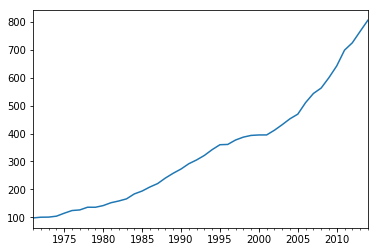

In [20]:
df2.India.plot()

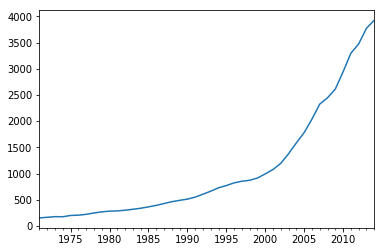

In [21]:
df2.China.plot()

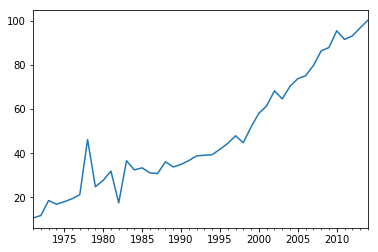

In [22]:
df2.Benin.plot()

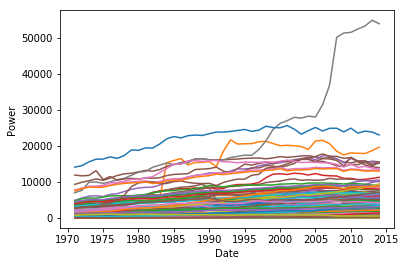

In [23]:
plt.xlabel("Date")
plt.ylabel("Power")
plt.plot(df2)

## From the above line graph it is clear that we can't predict electricity consumption for all countries together.Since the line graph varies differently for every country.
## So your main aim here is to predict the 'Electricity consumption in the India'.

## Methodology <a name="methodology"></a>

* To apply Arima Model the Data we have must be Stationary 
* To check whether the data we have is stationary or not we have Augmented Dickey-Fuller test.According to the data test.If the data available satisfy following two conditions then data will be stationary :
                                        1.p-value<0.05
                                        2.Test Statistic < Critical Value 1%  .
* Also we can see data is stationary or not Visually by observing rolling mean and rolling standard deviation over time.
* If the data is non stationary we will be using the various methods to convert data into stationary.
* Once the data becomes stationary we will be using the **ARIMA Model** to predict future values.

First we check visually data is stationary or not

In [24]:
rolmean=df2.India.rolling(window=1).mean()
rolstd=df2.India.rolling(window=2).std()
print(rolmean,rolstd)

1971-01-01     98.056459
1972-01-01    100.595171
1973-01-01    100.922518
1974-01-01    104.292848
1975-01-01    114.891039
1976-01-01    124.486503
1977-01-01    126.630124
1978-01-01    136.325603
1979-01-01    136.156335
1980-01-01    142.148885
1981-01-01    152.361874
1982-01-01    158.613609
1983-01-01    166.237573
1984-01-01    183.922646
1985-01-01    194.201705
1986-01-01    208.703547
1987-01-01    220.999760
1988-01-01    240.882651
1989-01-01    257.964015
1990-01-01    273.046613
1991-01-01    291.953805
1992-01-01    305.535929
1993-01-01    321.711471
1994-01-01    342.461839
1995-01-01    360.047053
1996-01-01    361.092501
1997-01-01    376.800678
1998-01-01    387.196900
1999-01-01    393.373199
2000-01-01    394.963810
2001-01-01    395.104759
2002-01-01    411.967398
2003-01-01    431.841132
2004-01-01    453.010206
2005-01-01    469.453923
2006-01-01    510.751618
2007-01-01    543.358645
2008-01-01    562.899170
2009-01-01    600.201702
2010-01-01    642.111615


Rolling mean and std for All countries

In [25]:
rolmean1=df2.rolling(window=1).mean()
rolstd1=df2.rolling(window=2).std()
print(rolmean1,rolstd1)

Country Name      Angola      Albania   Arab World  United Arab Emirates  \
1971-01-01     80.262510   532.028432   195.163395            677.885857   
1972-01-01     88.515108   568.403202   209.787297           1307.248467   
1973-01-01    101.402041   593.446746   228.947273           1689.435864   
1974-01-01    123.355406   591.032643   253.176038           1860.557870   
1975-01-01    127.432825   739.345093   280.426799           2296.490861   
1976-01-01     55.562608   908.674547   323.230395           2790.044873   
1977-01-01     53.990979  1067.814156   366.835612           3673.222237   
1978-01-01     52.410733  1098.483166   423.802994           4107.891705   
1979-01-01     54.620014  1065.767398   511.414499           4875.845553   
1980-01-01     56.663568  1142.965355   573.181169           5626.525350   
1981-01-01     54.735207  1123.968106   619.953929           5986.261040   
1982-01-01     56.354749  1096.873229   709.086962           6969.051192   
1983-01-01  

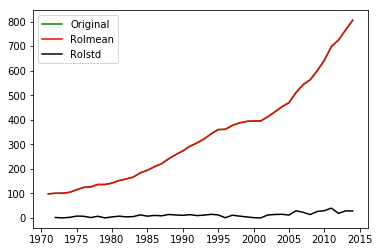

In [26]:
org=plt.plot(df2.India,color='green',label='Original')
rmean=plt.plot(rolmean,color='red',label='Rolmean')
rstd=plt.plot(rolstd,color='black',label='Rolstd')
plt.legend(loc='best')
plt.show(block=False)

By observing above line graph the data is clearly following a trend

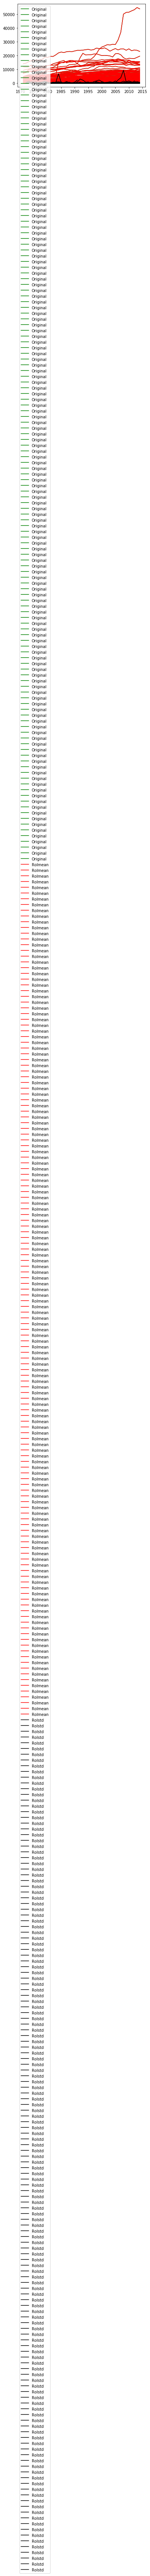

In [27]:
org1=plt.plot(df2,color='green',label='Original')
rmean1=plt.plot(rolmean1,color='red',label='Rolmean')
rstd1=plt.plot(rolstd1,color='black',label='Rolstd')
plt.legend(loc='best')
plt.show(block=False)

Here we can see that most of the countries are stationary even through we don't know which are stationary

Now by Augmented Dickey-Fuller test the two conditions are checked

In [28]:
#from statsmodels.tsa.stattools import adfuller
#from pandas.core import datetools 


from pandas import Series
from statsmodels.tsa.stattools import adfuller
dtest=adfuller(df2['India'],autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic           2.716992
P-value                 0.999088
Lagused                10.000000
No. of observations    33.000000
Critical Value 1%      -3.646135
Critical Value 5%      -2.954127
Critical Value 10%     -2.615968
dtype: float64


#### Since above data won't statisfy the two conditions the data is non stationary we have to make it stationary by some using some methods

#### Since we can't do Augmented Dickey-Fuller test for all the countries which will be difficult.So we will take another big country like India,china.We will proceed through same procedure and check whether it will work or not.


In [29]:
#from statsmodels.tsa.stattools import adfuller
#from pandas.core import datetools 


from pandas import Series
from statsmodels.tsa.stattools import adfuller
dtest=adfuller(df2.China,autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic           2.253441
P-value                 0.998924
Lagused                 8.000000
No. of observations    35.000000
Critical Value 1%      -3.632743
Critical Value 5%      -2.948510
Critical Value 10%     -2.613017
dtype: float64


#### From the above test it is clear that India and China data is also non stationary.
* To convert non stationary data to stationary we use two methods maily:
* 1.Differencing
* 2.Transformation

First here we try Log Transformation to data.

1971-01-01    4.585543
1972-01-01    4.611104
1973-01-01    4.614353
1974-01-01    4.647203
1975-01-01    4.743984
1976-01-01    4.824197
1977-01-01    4.841270
1978-01-01    4.915046
1979-01-01    4.913804
1980-01-01    4.956875
1981-01-01    5.026258
1982-01-01    5.066471
1983-01-01    5.113418
1984-01-01    5.214515
1985-01-01    5.268897
1986-01-01    5.340915
1987-01-01    5.398162
1988-01-01    5.484310
1989-01-01    5.552820
1990-01-01    5.609643
1991-01-01    5.676596
1992-01-01    5.722067
1993-01-01    5.773655
1994-01-01    5.836160
1995-01-01    5.886235
1996-01-01    5.889134
1997-01-01    5.931716
1998-01-01    5.958933
1999-01-01    5.974759
2000-01-01    5.978794
2001-01-01    5.979151
2002-01-01    6.020944
2003-01-01    6.068058
2004-01-01    6.115915
2005-01-01    6.151570
2006-01-01    6.235883
2007-01-01    6.297770
2008-01-01    6.333101
2009-01-01    6.397266
2010-01-01    6.464762
2011-01-01    6.549004
2012-01-01    6.585884
2013-01-01    6.640613
2014-01-01 

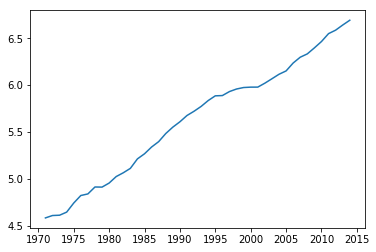

In [30]:
import numpy as np
df2_logScale=np.log(df2.India)
plt.plot(df2_logScale)
print(df2_logScale)

1971-01-01    5.023810
1972-01-01    5.099329
1973-01-01    5.170107
1974-01-01    5.160396
1975-01-01    5.293504
1976-01-01    5.318269
1977-01-01    5.396610
1978-01-01    5.507588
1979-01-01    5.588649
1980-01-01    5.640575
1981-01-01    5.655354
1982-01-01    5.701105
1983-01-01    5.758966
1984-01-01    5.818336
1985-01-01    5.893885
1986-01-01    5.969606
1987-01-01    6.055740
1988-01-01    6.135127
1989-01-01    6.189030
1990-01-01    6.235625
1991-01-01    6.308014
1992-01-01    6.404722
1993-01-01    6.496227
1994-01-01    6.589074
1995-01-01    6.646754
1996-01-01    6.710622
1997-01-01    6.748455
1998-01-01    6.769202
1999-01-01    6.817791
2000-01-01    6.900674
2001-01-01    6.981516
2002-01-01    7.085781
2003-01-01    7.229465
2004-01-01    7.368869
2005-01-01    7.485667
2006-01-01    7.620222
2007-01-01    7.751874
2008-01-01    7.802360
2009-01-01    7.868046
2010-01-01    7.987385
2011-01-01    8.101073
2012-01-01    8.153346
2013-01-01    8.235733
2014-01-01 

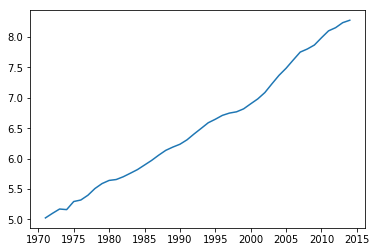

In [31]:
import numpy as np
df2_clogScale=np.log(df2.China)
plt.plot(df2_clogScale)
print(df2_clogScale)

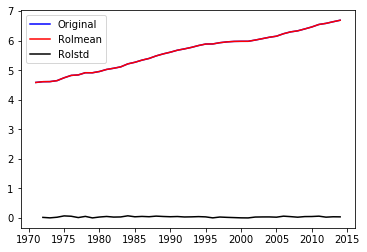

In [32]:
rolmean=df2_logScale.rolling(window=1).mean()
rolstd=df2_logScale.rolling(window=2).std()

org=plt.plot(df2_logScale,color='blue',label='Original')
rmean=plt.plot(rolmean,color='red',label='Rolmean')
rstd=plt.plot(rolstd,color='black',label='Rolstd')
plt.legend(loc='best')
plt.show(block=False)

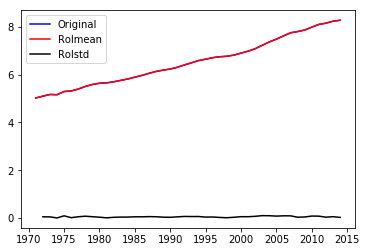

In [33]:
rolmean1=df2_clogScale.rolling(window=1).mean()
rolstd1=df2_clogScale.rolling(window=2).std()

org1=plt.plot(df2_clogScale,color='blue',label='Original')
rmean1=plt.plot(rolmean1,color='red',label='Rolmean')
rstd1=plt.plot(rolstd1,color='black',label='Rolstd')
plt.legend(loc='best')
plt.show(block=False)

#### Here from above two line graph we can see that the trend in rolling mean is reduced and data is still non stationary.

In [34]:
dtest=adfuller(df2_logScale,autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic          -0.325155
P-value                 0.921865
Lagused                 7.000000
No. of observations    36.000000
Critical Value 1%      -3.626652
Critical Value 5%      -2.945951
Critical Value 10%     -2.611671
dtype: float64


In [35]:
dtest=adfuller(df2_clogScale,autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic           1.297075
P-value                 0.996593
Lagused                 1.000000
No. of observations    42.000000
Critical Value 1%      -3.596636
Critical Value 5%      -2.933297
Critical Value 10%     -2.604991
dtype: float64


#### By adfuller test also the data is non stationary.So know we try apply differencing for the transformed data.

In [36]:
dflogscle=df2_logScale-df2_logScale.shift(1)
dflogscle.dropna(inplace=True)
dflogscle.head()

1972-01-01    0.025561
1973-01-01    0.003249
1974-01-01    0.032850
1975-01-01    0.096781
1976-01-01    0.080213
Name: India, dtype: float64

In [37]:
dfclogscle=df2_logScale-df2_clogScale.shift(1)
dfclogscle.dropna(inplace=True)
dfclogscle.head()

1972-01-01   -0.412706
1973-01-01   -0.484976
1974-01-01   -0.522905
1975-01-01   -0.416411
1976-01-01   -0.469307
dtype: float64

In [38]:
dtest=adfuller(dflogscle,autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic          -5.062679
P-value                 0.000017
Lagused                 0.000000
No. of observations    42.000000
Critical Value 1%      -3.596636
Critical Value 5%      -2.933297
Critical Value 10%     -2.604991
dtype: float64


In [39]:
dtest=adfuller(dfclogscle,autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic           0.900266
P-value                 0.993094
Lagused                 5.000000
No. of observations    37.000000
Critical Value 1%      -3.620918
Critical Value 5%      -2.943539
Critical Value 10%     -2.610400
dtype: float64


#### Now by appling differencing we can see that India data is sationary but China is not so we can concluded that it is not possible to bring all countries data into stationary by applying same process so we can't build process for all countries .So from now onwards we will focus only on India.

#### Lets try to convert china data to stationary by once again applying differencing

In [40]:
dfclogscle=dfclogscle-dfclogscle.shift(1)
dfclogscle.dropna(inplace=True)
dfclogscle.head()

1973-01-01   -0.072270
1974-01-01   -0.037928
1975-01-01    0.106493
1976-01-01   -0.052896
1977-01-01   -0.007691
dtype: float64

In [41]:
dtest=adfuller(dfclogscle,autolag='AIC')
dout=pd.Series(dtest[0:4],index=['Test staistic','P-value','Lagused','No. of observations'])

for key,value in dtest[4].items():
    dout['Critical Value %s'%key]=value

print(dout)

Test staistic          -2.374044
P-value                 0.149197
Lagused                 4.000000
No. of observations    37.000000
Critical Value 1%      -3.620918
Critical Value 5%      -2.943539
Critical Value 10%     -2.610400
dtype: float64


#### Still the China is not stationary by adfuller test so we stop it here and focus our attention on India.

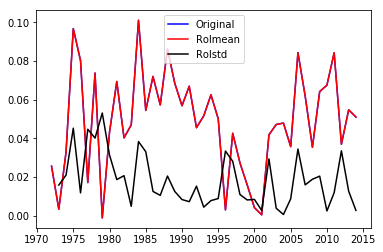

In [42]:
rolmean=dflogscle.rolling(window=1).mean()
rolstd=dflogscle.rolling(window=2).std()

org=plt.plot(dflogscle,color='blue',label='Original')
rmean=plt.plot(rolmean,color='red',label='Rolmean')
rstd=plt.plot(rolstd,color='black',label='Rolstd')
plt.legend(loc='best')
plt.show(block=False)

#### Here we can see that  India data is stationary with no trends in them

## Analysis <a name="analysis"></a>

* Here we will be using the **ARIMA model** for analysis

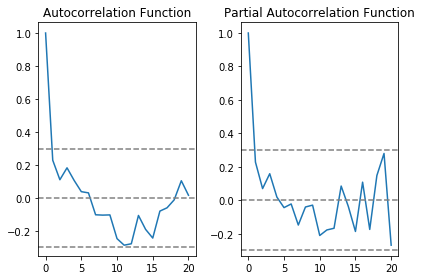

In [43]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dflogscle, nlags=20)
lag_pacf = pacf(dflogscle, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogscle)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogscle)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dflogscle)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dflogscle)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### Now the data is stationary .So we will go for Arima model.It has three parameters which can be found by above line graph where it meets the top dashed line at approximately 2.So p=2,q=1,i=2. will be the best fit.

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0265')

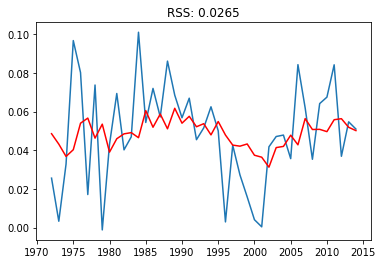

In [44]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df2_logScale, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(dflogscle)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dflogscle)**2))

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0265')

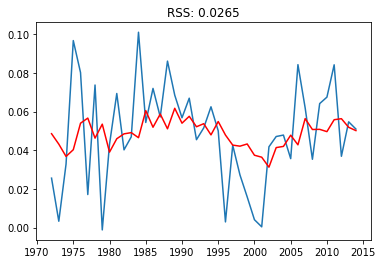

In [45]:
model = ARIMA(df2_logScale, order=(2, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(dflogscle)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dflogscle)**2))

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0265')

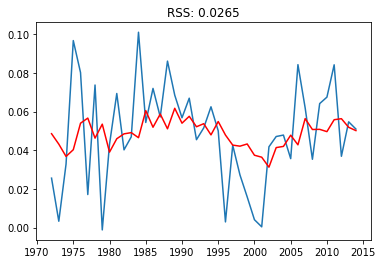

In [46]:
model = ARIMA(df2_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(dflogscle)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dflogscle)**2))

#### RSS value of Arima model is always less than or equal to AR and MA models

#### Now Our ARIMA model is ready to predict the Values .The predicted valued are not real values.Since we have performed differencing and Transformation on the real data to convert to stationary.So we perform counter operations to obtain real values.

In [47]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [48]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [49]:
predictions_ARIMA_log = pd.Series(df2_logScale.ix[0], index=df2_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


1971-01-01    4.585543
1972-01-01    4.634112
1973-01-01    4.677272
1974-01-01    4.714075
1975-01-01    4.754354
dtype: float64

Text(0.5, 1.0, 'RMSE: 15.3262')

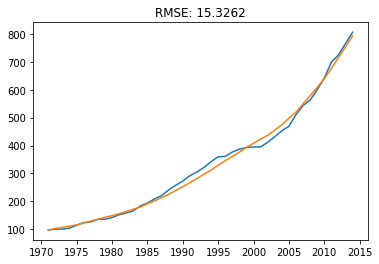

In [50]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df2.India)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df2.India)**2)/len(df2.India)))

## Results and Discussion <a name="results"></a>

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


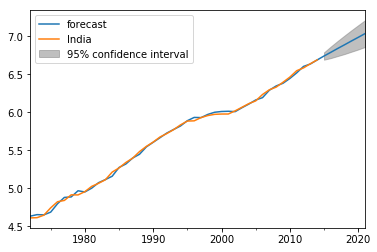

In [51]:
results_ARIMA.plot_predict(1,50)
x=results_ARIMA.forecast(steps=10)

### The following are the original predictions obtained using ARIMA model.

In [52]:
np.exp(x[2])
df_India = pd.DataFrame({'2017': [np.exp(x[2][2])],'2018': [np.exp(x[2][3])],'2019': [np.exp(x[2][4])]})
df_India.transpose()

,0
2017,"[847.4772556826694, 1033.9308734434248]"
2018,"[870.2618795735182, 1109.4855111801]"
2019,"[896.8834059161824, 1188.698596593864]"


### From wikipedia the per captia of India in 2017-18 year is around 1.149kwh which is slightly greater than the estimated due to rapid industrialization.You can check the value by checking the link given below

In [53]:
%%html
<a href="https://www.google.com/search?client=ubuntu&hs=IpQ&channel=fs&ei=hXYxXY-LMPfWz7sPgpilqAI&q=electricity+consumption+of+india+2017-18&oq=electricity+consumption+of+india+2017-18&gs_l=psy-ab.3...9120.12358..12675...0.0..0.367.1833.0j3j4j1......0....1..gws-wiz.......0i71j0i22i30j33i21.qE-0ujV9lGo&ved=0ahUKEwjP4Yv2v8DjAhV363MBHQJMCSUQ4dUDCAo&uact=5" title ="Electricity consumption in India during 2017-2018" target="_blank"">Wikipedia link</a>

### So our conclusion for predicted value is slighty out of range we don't have the data for 2015,2016 if have those data the model should have predicted accurate value.Same procedure can also applied for the other countries by converting their data to stationary.

# Visualization using Choropleth Maps: <a name="maps"></a>

#### Installing folium libraries for better visualization of the '2014 per capita electricity consumption in (Kwh) all over the world ' using choropleth maps. So by predicting the electricity consumption of the various countries using the ARIMA model we can visualize for 2018 electricity requirement from the data available but the to predict values using ARIMA model all the data must be stationary which not the case here.So we visulaize the electricity consumption in 2014.Same can be used for 2018 but  we must predict all the by bringing all the data stationary which will be very difficult.

In [54]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')




Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### Here for choropleth maps visualization we need location data of all the countries which directly available in the Cognitive Class so instead of using the **Foursquare API** we can use directly this file for the required location data which I will be doing here.

In [55]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [56]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [57]:
df9=df.reset_index()

Here using the folium to generate the required Choloropeth Maps using the Location data available

In [58]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df9,
    columns=['Country Name', '2014'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Per Captia Electricity in(KWH)'
)

# display map
world_map

# Eliminationg negative threshold values

In [59]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df9['2014'].min(),
                              df9['2014'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df9,
    columns=['Country Name', '2014'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Per Captia Electricity in(KWH)',
    reset=True
)
world_map

## Conclusion: <a name="conclusion"></a>


   ###  Here in the Notebook we have Predicted the India Electricity Consumption for 2018 somewhat accurately by uploading data of 2015,16,17,18 we can accurately Predict Electricity Consumption for 2019 and upcoming years.So By knowing the Electricity Consumption requirement for future Developing country India could either try to reduce consumption or increase production of electricity through various resources available in it.Also It is majorly dependent on the non renewable resources like coal which may extinguish in coming years.So to compensate for this India should start aiming at increasing the production of Renewable energy through solar,wind,tidal etc.These all predictions of time for which coal will be available and time required to rise the Renewable energy can obtained using Time Series analysis using ARIMA model.So using this ARIMA model country like India can make plans to effective and efficient use of available resources to meet the Power Requirement in coming years.